Name Of creator
Parth Choubey


In [1300]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

importing necessary libraries


In [1301]:
df = pd.read_csv('value_strategy_2.csv')
df.head(5)

,Ticker,Price,Price-to-Earnings Ratio,PE Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,Value Score,Number of Shares to Buy
0,UNM,29.04,7.77,0.133,0.56,0.087,0.46,0.022,3.60,0.048,0.43,0.010,0.060,83358
1,MCK,195.80,-7.06,0.099,-1507.20,0.004,0.13,0.010,7.57,0.093,2.61,0.105,0.062,12363
2,AIV,195.81,-76.61,0.024,2.03,0.299,-31.76,0.002,-44.29,0.008,-53.16,0.006,0.068,343852
3,AIG,195.82,-11.09,0.087,0.67,0.091,0.96,0.085,6.09,0.065,0.94,0.026,0.071,49911
4,L,195.83,-409.90,0.004,0.88,0.099,1.04,0.099,8.29,0.135,1.02,0.028,0.073,42738


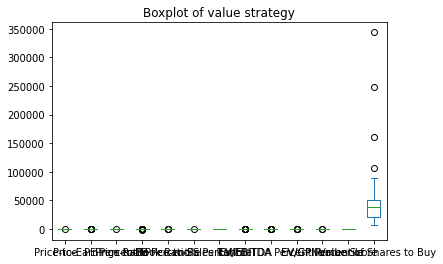

In [1302]:
df.plot.box(title='Boxplot of value strategy')

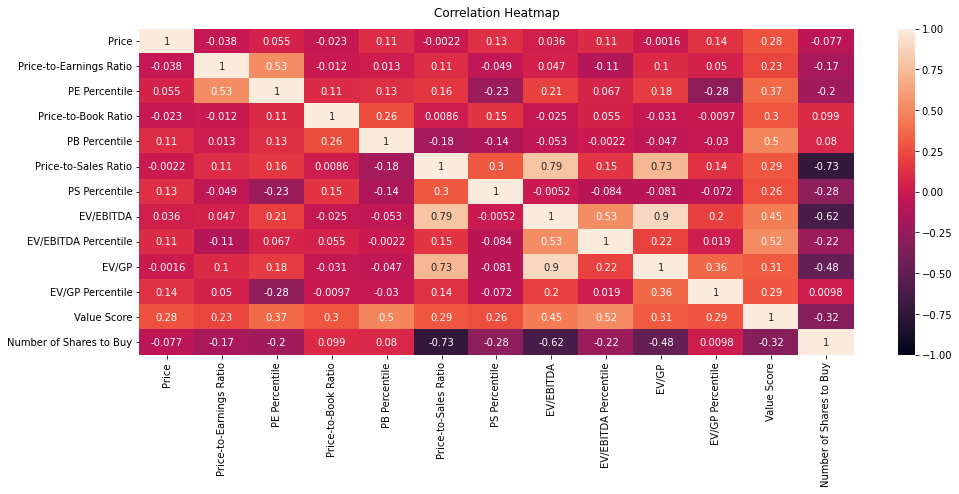

In [1303]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Text(0.5, 1.0, 'Histogram Of Price to book ratio')

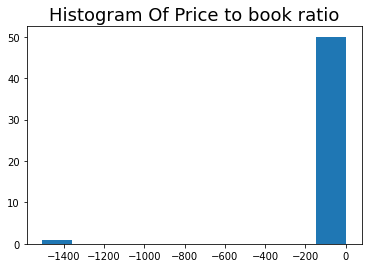

In [1304]:
plt.hist(df['Price-to-Book Ratio'])
plt.title('Histogram Of Price to book ratio', fontsize = 18)

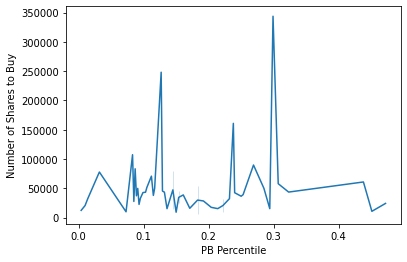

In [1305]:
sns.lineplot(data=df, x='PB Percentile', y='Number of Shares to Buy')

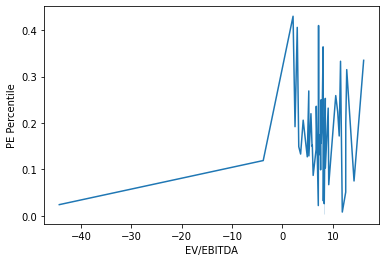

In [1306]:
sns.lineplot(data=df, x='EV/EBITDA', y='PE Percentile')

In [1307]:
df_clean1 = df.copy()

In [1308]:
df_clean1.columns

Index(['Ticker', 'Price', 'Price-to-Earnings Ratio', 'PE Percentile',
       'Price-to-Book Ratio', 'PB Percentile', 'Price-to-Sales Ratio',
       'PS Percentile', 'EV/EBITDA', 'EV/EBITDA Percentile', 'EV/GP',
       'EV/GP Percentile', 'Value Score', 'Number of Shares to Buy'],
      dtype='object')

In [1309]:
cor = df_clean1.corr()
cor_target = abs(cor['Number of Shares to Buy'])

relevant_features = cor_target[cor_target>0.5]
relevant_features

Price-to-Sales Ratio       0.733744
EV/EBITDA                  0.620183
Number of Shares to Buy    1.000000
Name: Number of Shares to Buy, dtype: float64

In [1310]:
print(df_clean1[['Price-to-Sales Ratio','EV/EBITDA']].corr())

                      Price-to-Sales Ratio  EV/EBITDA
Price-to-Sales Ratio              1.000000   0.792278
EV/EBITDA                         0.792278   1.000000


In [1311]:
df_clean1 = df_clean1.drop(columns=['Price-to-Earnings Ratio'])

In [1312]:
df_clean1 = df_clean1.drop(columns=['Price-to-Book Ratio'])

In [1313]:
df_clean1 = df_clean1.drop(columns=['PB Percentile'])

In [1314]:
df_clean1 = df_clean1.drop(columns=['PE Percentile'])

In [1315]:
df_clean1 = df_clean1.drop(columns=['Ticker'])

In [1316]:
df_clean1

,Price,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,Value Score,Number of Shares to Buy
0,29.040,0.46,0.022,3.60,0.048,0.43,0.010,0.060,83358
1,195.800,0.13,0.010,7.57,0.093,2.61,0.105,0.062,12363
2,195.810,-31.76,0.002,-44.29,0.008,-53.16,0.006,0.068,343852
3,195.820,0.96,0.085,6.09,0.065,0.94,0.026,0.071,49911
4,195.830,1.04,0.099,8.29,0.135,1.02,0.028,0.073,42738
5,195.840,0.48,0.026,8.29,0.137,2.82,0.117,0.088,70781
6,195.850,1.09,0.103,-3.82,0.038,3.18,0.143,0.097,107396
7,196.840,0.12,0.008,8.51,0.152,4.30,0.212,0.097,20549
8,195.860,0.61,0.042,8.20,0.127,3.27,0.147,0.106,77836
9,195.870,0.88,0.073,2.49,0.042,0.84,0.022,0.107,17512


In [1317]:
df_clean1.shape

(51, 9)

In [1318]:
df_clean1 = df_clean1.dropna()

In [1319]:
df_clean1.isnull().sum()

Price                      0
Price-to-Sales Ratio       0
PS Percentile              0
EV/EBITDA                  0
EV/EBITDA Percentile       0
EV/GP                      0
EV/GP Percentile           0
Value Score                0
Number of Shares to Buy    0
dtype: int64

In [1320]:
duplicate_rows = df_clean1.duplicated()  
df_clean = df_clean1[~duplicate_rows]
df_clean1.shape

(51, 9)

In [1321]:
df_clean1.dtypes

Price                      float64
Price-to-Sales Ratio       float64
PS Percentile              float64
EV/EBITDA                  float64
EV/EBITDA Percentile       float64
EV/GP                      float64
EV/GP Percentile           float64
Value Score                float64
Number of Shares to Buy      int64
dtype: object

In [1322]:
df_clean1["Number of Shares to Buy"] = df_clean1['Number of Shares to Buy'].astype(float)
df_clean1.dtypes

Price                      float64
Price-to-Sales Ratio       float64
PS Percentile              float64
EV/EBITDA                  float64
EV/EBITDA Percentile       float64
EV/GP                      float64
EV/GP Percentile           float64
Value Score                float64
Number of Shares to Buy    float64
dtype: object

In [1323]:
df_clean1.describe()

,Price,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,Value Score,Number of Shares to Buy
count,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,192.295706,0.44902,0.121510,6.099608,0.133078,0.520588,0.106725,0.142706,50594.294118
std,23.321700,4.64956,0.108007,8.774222,0.106151,10.004988,0.095950,0.040499,58340.029475
min,29.040000,-31.76000,0.002000,-44.290000,0.008000,-53.160000,0.006000,0.060000,6295.000000
25%,195.109500,0.51500,0.032000,5.760000,0.060000,1.225000,0.039000,0.116500,20246.000000
50%,195.810000,1.04000,0.099000,7.670000,0.099000,1.940000,0.075000,0.146000,37900.000000
75%,195.935000,1.42500,0.177000,8.505000,0.151000,3.225000,0.145000,0.178500,50783.000000
max,196.840000,2.74000,0.377000,16.110000,0.473000,7.440000,0.432000,0.199000,343852.000000


After Cleaning We start to assign target and feature variables


In [1324]:
df=df_clean1

In [1325]:
df

,Price,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,Value Score,Number of Shares to Buy
0,29.040,0.46,0.022,3.60,0.048,0.43,0.010,0.060,83358.0
1,195.800,0.13,0.010,7.57,0.093,2.61,0.105,0.062,12363.0
2,195.810,-31.76,0.002,-44.29,0.008,-53.16,0.006,0.068,343852.0
3,195.820,0.96,0.085,6.09,0.065,0.94,0.026,0.071,49911.0
4,195.830,1.04,0.099,8.29,0.135,1.02,0.028,0.073,42738.0
5,195.840,0.48,0.026,8.29,0.137,2.82,0.117,0.088,70781.0
6,195.850,1.09,0.103,-3.82,0.038,3.18,0.143,0.097,107396.0
7,196.840,0.12,0.008,8.51,0.152,4.30,0.212,0.097,20549.0
8,195.860,0.61,0.042,8.20,0.127,3.27,0.147,0.106,77836.0
9,195.870,0.88,0.073,2.49,0.042,0.84,0.022,0.107,17512.0


In [1326]:
y = df['Number of Shares to Buy']

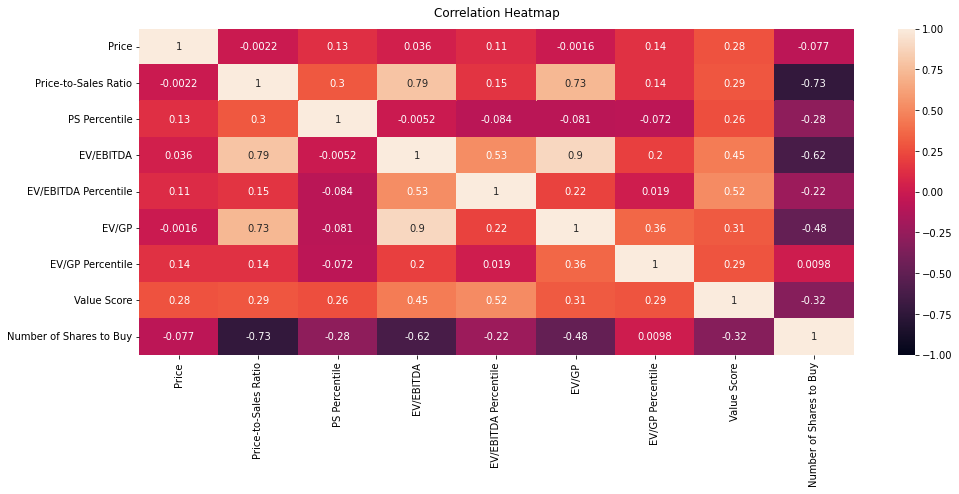

In [1327]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [1328]:
X = df.iloc[:, :-1]
X

,Price,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,Value Score
0,29.040,0.46,0.022,3.60,0.048,0.43,0.010,0.060
1,195.800,0.13,0.010,7.57,0.093,2.61,0.105,0.062
2,195.810,-31.76,0.002,-44.29,0.008,-53.16,0.006,0.068
3,195.820,0.96,0.085,6.09,0.065,0.94,0.026,0.071
4,195.830,1.04,0.099,8.29,0.135,1.02,0.028,0.073
5,195.840,0.48,0.026,8.29,0.137,2.82,0.117,0.088
6,195.850,1.09,0.103,-3.82,0.038,3.18,0.143,0.097
7,196.840,0.12,0.008,8.51,0.152,4.30,0.212,0.097
8,195.860,0.61,0.042,8.20,0.127,3.27,0.147,0.106
9,195.870,0.88,0.073,2.49,0.042,0.84,0.022,0.107


Applying ML Models


In [1329]:
X_train, X_left, y_train, y_left = train_test_split(X,y, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_left,y_left, test_size=0.5)

In [1330]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [1331]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [1332]:
model= DecisionTreeRegressor()

In [1333]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [1334]:
y_predict = model.predict(X_test)

In [1335]:
accuracy_score(y_test, y_predict)

0.0

In [1336]:
from sklearn.linear_model import LinearRegression

In [1337]:
from sklearn import neighbors

In [1338]:
model2=neighbors.KNeighborsRegressor(n_neighbors = 3)

In [1339]:
model2.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [1340]:
y2_predict = model2.predict(X_test)

In [1341]:
mean_squared_error(y_test,y2_predict)

2923901971.7592583